# Navigating Movie Scripts

In this notebook, we explain
how to use Mappa Mundi (MM) to do causal DEFT (DAG extraction from text)
using as a test case, the following 3 movie scripts by Pixar/Disney.

* [Toy Story](../m_scripts/toy-story.txt)
* [Up](../m_scripts/up.txt)
* [WALL-E](../m_scripts/wall-e.txt)

In [1]:
# set this to True if running on Google Colab
COLAB = True

In [2]:
# this is necessary iff running on Colab for first time
if COLAB:
    !git clone https://github.com/rrtucci/mappa_mundi.git
    %cd mappa_mundi/
    !pip install -r requirements.txt

Cloning into 'mappa_mundi'...
remote: Enumerating objects: 983, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 983 (delta 120), reused 135 (delta 62), pack-reused 774
Receiving objects: 100% (983/983), 8.38 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (617/617), done.
/content/mappa_mundi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.1 MB/s eta 0:00:00


In [3]:
# this makes sure it starts looking for things from the project folder down.

import os
import sys
if not COLAB:
    os.chdir('../')
else:
    os.chdir('/content/mappa_mundi')
    # kaggle
    # os.chdir('/kaggle/working/mappa_mundi')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/content/mappa_mundi


In [4]:
from utils import *
print_welcome_message()

Welcome Causal AI Navigator. We have been waiting for you for millennia. Where would you like us to go next?


## Global variables
All the global variables used by Mappa Mundi are  defined in this file.
Change with caution.


[globals.py](../globals.py)

## Originals

Here is the original form of the movie scripts, in the form they were downloaded
from the IMSDb website.

* [Toy Story](../m_scripts/toy-story.txt)
* [Up](../m_scripts/up.txt)
* [WALL-E](../m_scripts/wall-e.txt)

## Cleaning

The results of the following step can be found in the **m_scripts_clean**
directory.

* [Toy Story (clean)](../m_scripts_clean/toy-story.txt)
* [Up (clean)](../m_scripts_clean/up.txt)
* [WALL-E (clean)](../m_scripts_clean/wall-e.txt)

In [5]:
from cleaning import *

remove_dialog = False
# batch_file_names=my_listdir(M_SCRIPTS_DIR)
batch_file_names = ["toy-story.txt", "up.txt", "wall-e.txt"]
clean_batch_of_m_scripts(
    in_dir=M_SCRIPTS_DIR,
    out_dir=CLEAN_DIR if not remove_dialog else CLEAN_RD_DIR,
    batch_file_names=batch_file_names,
    remove_dialog=remove_dialog)

1.
fetching toy-story.txt
indent prob dist = [(0, 1.0), (1, 0.0)]
dialog indents= [0]
narration indents= []
2.
fetching up.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
3.
fetching wall-e.txt
indent prob dist = [(0, 0.998), (1, 0.002)]
dialog indents= [0]
narration indents= []


## Spell-checking

The results of the following step can be found in the **m_scripts_spell** directory

* [Toy Story (spell)](../m_scripts_spell/toy-story.txt)
* [Up (spell)](../m_scripts_spell/up.txt)
* [WALL-E (spell)](../m_scripts_spell/wall-e.txt)

In [6]:
from spell_checking import *
use_local_dict=True
error_type = "all"

print("use_local_dict=", use_local_dict)
print("error_type=", error_type)
print("SPELLING_CORRECTION_RISK=", SPELLING_CORRECTION_RISK)
print()

in_dir = "m_scripts_clean"
out_dir = "m_scripts_spell"
batch_file_names = my_listdir(in_dir)
correct_this_batch_of_files(in_dir,
                            out_dir,
                            batch_file_names,
                            error_type= error_type,
                            verbose=False,
                            use_local_dict=use_local_dict)

use_local_dict= True
error_type= all
SPELLING_CORRECTION_RISK= 1e-08

1.
toy-story.txt
all changes: [('mon', 'mom'), ('mon', 'mom'), ('etc', 'etch'), ('heh', 'he'), ('mon', 'mom'), ('mon', 'mom'), ('mon', 'mom'), ('mon', 'mom'), ('heh', 'he'), ('heh', 'he'), ('puttin', 'putting'), ('heh', 'he'), ('heh', 'he'), ('heh', 'he'), ('whirrrr', 'whirrr'), ('sayin', 'saying'), ('mon', 'mom'), ('cuttin', 'cutting'), ('playin', 'playing'), ('mon', 'mom'), ('mon', 'mom'), ('talkin', 'talking'), ('mon', 'mom'), ('mon', 'mom'), ('mon', 'mom'), ('cla', 'claw'), ('heh', 'he'), ('movin', 'moving'), ('tri', 'try'), ('heh', 'he'), ('mon', 'mom'), ('sec', 'see'), ('lyin', 'lying'), ('mon', 'mom'), ('mon', 'mom'), ('heh', 'he'), ('callin', 'calling'), ('shoulda', 'should')]
2.
up.txt
all changes: [('raaar', 'radar'), ('mon', 'mom'), ('wha', 'what'), ('wa', 'was'), ('mon', 'mom')]
3.
wall-e.txt
all changes: [('spork', 'spark'), ('rec', 'red'), ('rec', 'red'), ('tive', 'time'), ('difficul', 'difficult'), ('n

## Simplifying

The results of the following step can be found in the **m_scripts_simp** directory

* [Toy Story (simp)](../m_scripts_simp/toy-story.txt)
* [Up (simp)](../m_scripts_simp/up.txt)
* [WALL-E (simp)](../m_scripts_simp/wall-e.txt)

In [7]:
# from simplifying import *

# in_dir = "m_scripts_spell"
# out_dir = "m_scripts_simp"
# batch_file_names = my_listdir(in_dir)[0:3]
# simplify_batch_of_m_scripts(
#     in_dir, out_dir,
#     batch_file_names,
#     verbose=False)

Open the following jupyter notebook in your Google Colab account and run it

https://colab.research.google.com/drive/1S2EWOGkoCgjfOJzTRJ7PLeu4T8SBwhlF?usp=sharing

Then download the resulting simplified movie scripts to the folder `m_scripts_simp`.
We have done this for you in the Mappa_Mundi repo for 3 Pixar movies.

## Post Cleaning

The results of the following step can be found in the **m_scripts_post_clean** directory

* [Toy Story (post-clean)](../m_scripts_post_clean/toy-story.txt)
* [Up (post-clean)](../m_scripts_post_clean/up.txt)
* [WALL-E (post-clean)](../m_scripts_post_clean/wall-e.txt)

In [8]:
from post_cleaning import *
remove_dialogs = False
in_dir = SIMP_DIR if not remove_dialogs else SIMP_RD_DIR
out_dir = POST_CLEAN_DIR if not remove_dialogs else POST_CLEAN_RD_DIR
batch_file_names = my_listdir(in_dir)[0:3]
post_clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


1. toy-story.txt
2. up.txt
3. wall-e.txt


## DAG Atlas creation


The results of the following step can be found in the **m_scripts_dag_atlas** directory. They are 3 pickled
files, one for each of the 3 movie scripts. They will be opened in the next step.

In [9]:
print(SIMI_THRESHOLD)

2


In [10]:
%%bash
# mkdir m_scripts_dag_atlas

In [11]:
from DagAtlas import *

simp_dir = "m_scripts_post_clean"
dag_dir = "m_scripts_dag_atlas"
atlas = DagAtlas(simp_dir, dag_dir)
all_titles = [file_name[:-len(".txt")] \
              for file_name in my_listdir(simp_dir)]
atlas.update_arrows_in_batch_of_m_scripts(
    batch_titles=all_titles[0:3])

Initiating DagAtlas object: 0.00 minutes



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Starting comparison of 2 titles: 0.09 minutes
title1 and its num of nodes: toy-story 2315
title2 and its num of nodes: up 2155
product of numbers of nodes= 4988825
Starting bridges: 0.09 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
11 bridges
12 bridges
13 bridges
14 bridges
15 bridges
16 bridges
17 bridges
18 bridges
19 bridges
20 bridges
21 bridges
22 bridges
23 bridges
24 bridges
25 bridges
26 bridges
27 bridges
28 bridges
29 bridges
30 bridges
31 bridges
32 bridges
33 bridges
34 bridges
35 bridges
36 bridges
37 bridges
38 bridges
39 bridges
40 bridges
41 bridges
42 bridges
43 bridges
44 bridges
45 bridges
46 bridges
47 bridges
48 bridges
49 bridges
50 bridges
51 bridges
52 bridges
53 bridges
54 bridges
55 bridges
56 bridges
57 bridges
58 bridges
59 bridges
60 bridges
61 bridges
62 bridges
63 bridges
64 bridges
65 bridges
66 bridges
67 bridges
68 bridges
69 bridges
70 bridges
71 bridges
72 bridges
73 bridges
74 bridges


## Visualizing

In the following step, we a draw DAG for each of the 3 movie scripts, based on the
pickled files in the **movie_scripts_dag_atlas** directory.
We do this for 2 arrow repetition thresholds: 20,15

In [12]:
from Dag import *

def visualize_all_dags(prob_acc_thold, nsam_thold, draw):

    dag_dir = "m_scripts_dag_atlas"
    simp_dir = "m_scripts_simp"
    clean_dir = "m_scripts_clean"
    file_names = [file_name for
                  file_name in my_listdir(dag_dir)[0:3]]
    dags = []
    for fname in file_names:
        path = dag_dir + "/" + fname
        with open(path, "rb") as f:
            dag = pik.load(f)
            dags.append(dag)
    for dag in dags:
        print("-------------------------")
        print(dag.m_title)
        hprobs_arrows = dag.build_high_prob_acc_arrows(
            prob_acc_thold, nsam_thold)
        print({arrow_str(arrow):dag.arrow_to_acc_rej_nums[arrow] \
               for arrow in hprobs_arrows})
        print()
        if draw:
            dag.draw(prob_acc_thold, nsam_thold, jupyter=True)
            dag.print_map_legend(clean_dir, simp_dir, prob_acc_thold, nsam_thold)

In [13]:
print(SIMI_THRESHOLD)

2


-------------------------
toy-story
{'(815,0)->(1619,0)': [42, 3], '(815,0)->(1652,0)': [20, 0], '(815,0)->(2185,0)': [20, 0], '(815,0)->(2559,0)': [19, 1], '(1282,1)->(1652,0)': [19, 1], '(1282,1)->(2185,0)': [19, 1], '(1296,0)->(1619,0)': [42, 3], '(1296,0)->(1652,0)': [20, 0], '(1296,0)->(2185,0)': [20, 0], '(1296,0)->(2559,0)': [19, 1], '(1385,0)->(1652,0)': [29, 3], '(1385,0)->(2157,0)': [24, 0], '(1385,0)->(2185,0)': [29, 3], '(1619,0)->(1652,0)': [33, 3], '(1619,0)->(2157,0)': [25, 2], '(1619,0)->(2185,0)': [33, 3], '(2031,0)->(2185,0)': [20, 0], '(2031,0)->(2559,0)': [19, 1], '(2202,0)->(2559,0)': [19, 1], '(2488,0)->(2559,0)': [19, 1]}



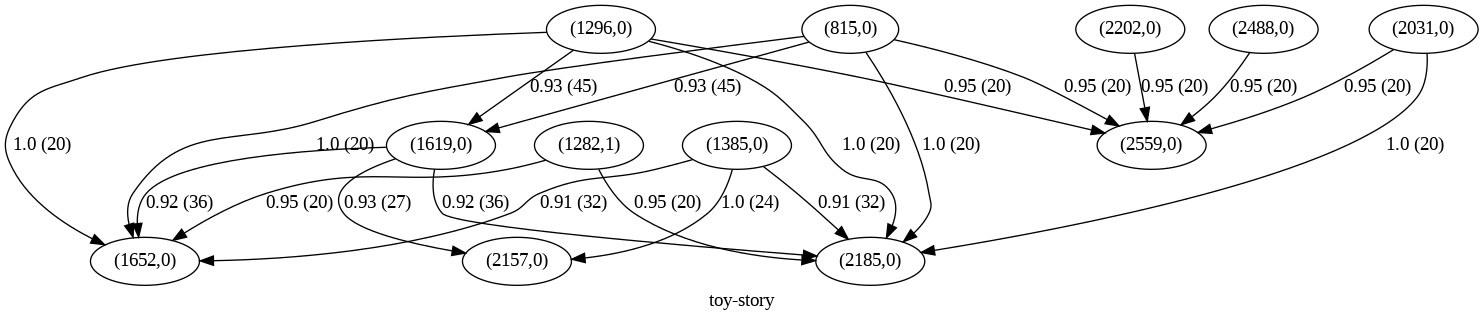

MAP LEGEND
title: toy-story
prob of acceptance threshold: 0.9
number of samples threshold: 20
number of arrows shown: 20
number of arrows dropped: 8772
(815,0):
(FULL) What are you doing?!!
(PART) What are you doing !
(1282,1):
(FULL) He grabs hold of the locking latch and, after a few attempts, is able to pry the door open.
(PART) He , after a few attempts , is able to pry the door open .
(1296,0):
(FULL) What are you doing?
(PART) What are you doing ?
(1385,0):
(FULL) He opens the door.
(PART) He opens the door .
(1619,0):
(FULL) A bird flies past.
(PART) A bird flies past .
(1652,0):
(FULL) Let us go!!
(PART) Let us go !
(2031,0):
(FULL) What are you doing?
(PART) What are you doing ?
(2157,0):
(FULL) Alright, let us go.
(PART) Alright , let us go .
(2185,0):
(FULL) Let us go!
(PART) Let us go !
(2202,0):
(FULL) What are you doing?!
(PART) What are you doing !
(2488,0):
(FULL) What are you doing?
(PART) What are you doing ?
(2559,0):
(FULL) He turns and motions back into the tree.
(

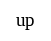

MAP LEGEND
title: up
prob of acceptance threshold: 0.9
number of samples threshold: 20
number of arrows shown: 0
number of arrows dropped: 12074
-------------------------
wall-e
{'(1643,0)->(1854,0)': [30, 1], '(1643,0)->(2675,0)': [18, 2]}



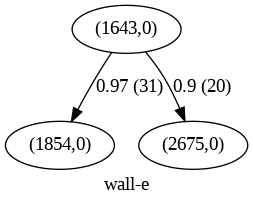

MAP LEGEND
title: wall-e
prob of acceptance threshold: 0.9
number of samples threshold: 20
number of arrows shown: 2
number of arrows dropped: 5423
(1643,0):
(FULL) She giggles.
(PART) She giggles .
(1854,0):
(FULL) He looks up at the screen.
(PART) He looks up at the screen .
(2675,0):
(FULL) Turns him back around.
(PART) Turns him back around .


In [14]:
visualize_all_dags(prob_acc_thold=.9, nsam_thold=20, draw=True)

-------------------------
toy-story
{'(228,0)->(789,0)': [15, 1], '(346,0)->(1652,0)': [16, 0], '(346,0)->(2185,0)': [16, 0], '(349,0)->(1619,0)': [18, 0], '(350,0)->(1619,0)': [18, 0], '(717,0)->(1619,0)': [18, 0], '(789,0)->(955,0)': [15, 1], '(789,0)->(1712,0)': [15, 1], '(789,0)->(2004,0)': [15, 1], '(815,0)->(892,0)': [14, 1], '(815,0)->(1407,0)': [14, 1], '(815,0)->(1619,0)': [42, 3], '(815,0)->(1652,0)': [20, 0], '(815,0)->(2157,0)': [15, 0], '(815,0)->(2185,0)': [20, 0], '(815,0)->(2559,0)': [19, 1], '(1171,0)->(1652,0)': [16, 0], '(1171,0)->(2185,0)': [16, 0], '(1282,1)->(1652,0)': [19, 1], '(1282,1)->(2157,0)': [15, 0], '(1282,1)->(2185,0)': [19, 1], '(1296,0)->(1407,0)': [14, 1], '(1296,0)->(1619,0)': [42, 3], '(1296,0)->(1652,0)': [20, 0], '(1296,0)->(2157,0)': [15, 0], '(1296,0)->(2185,0)': [20, 0], '(1296,0)->(2559,0)': [19, 1], '(1385,0)->(1652,0)': [29, 3], '(1385,0)->(2157,0)': [24, 0], '(1385,0)->(2185,0)': [29, 3], '(1619,0)->(1652,0)': [33, 3], '(1619,0)->(2157,0)':

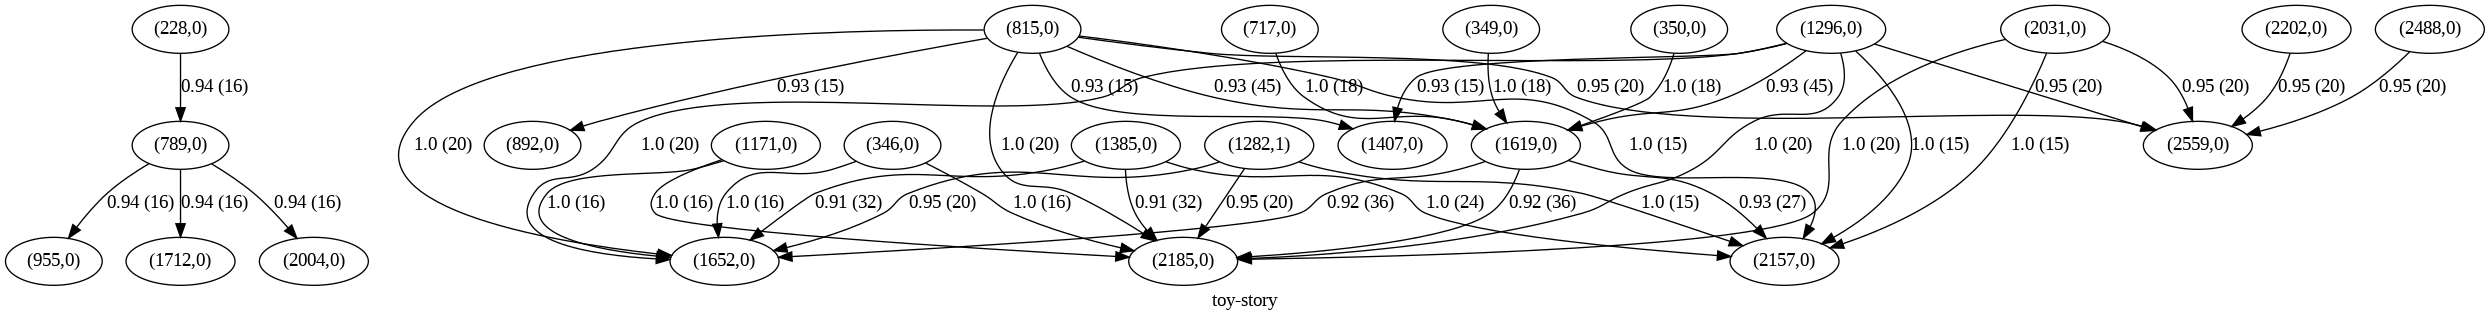

MAP LEGEND
title: toy-story
prob of acceptance threshold: 0.9
number of samples threshold: 15
number of arrows shown: 38
number of arrows dropped: 8754
(228,0):
(FULL) What is going on down there?
(PART) What is going on down there ?
(346,0):
(FULL) There they are.
(PART) There they are .
(349,0):
(FULL) This is it!
(PART) This is it !
(350,0):
(FULL) This is it!
(PART) This is it !
(717,0):
(FULL) That is it!
(PART) That is it !
(789,0):
(FULL) Do not move, Carl.
(PART) Do not move , Carl .
(815,0):
(FULL) What are you doing?!!
(PART) What are you doing !
(892,0):
(FULL) Oh, he is there.
(PART) Oh , he is there .
(955,0):
(FULL) Let us string him up by his pull- string!
(PART) Let us string him up by his pull - string !
(1171,0):
(FULL) There you are.
(PART) There you are .
(1282,1):
(FULL) He grabs hold of the locking latch and, after a few attempts, is able to pry the door open.
(PART) He , after a few attempts , is able to pry the door open .
(1296,0):
(FULL) What are you doing?
(P

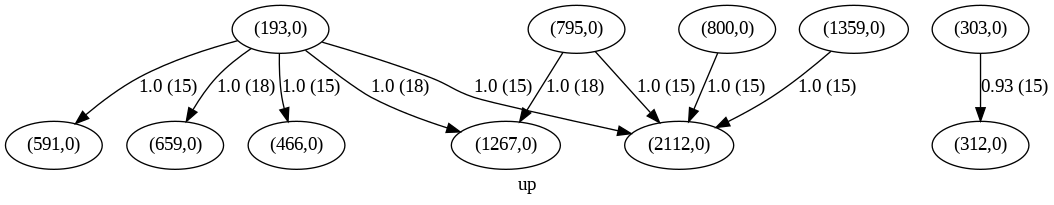

MAP LEGEND
title: up
prob of acceptance threshold: 0.9
number of samples threshold: 15
number of arrows shown: 10
number of arrows dropped: 12064
(193,0):
(FULL) That is it!
(PART) That is it !
(303,0):
(FULL) She tries to get up but falls again.
(PART) She tries to get up .
(312,0):
(FULL) He kisses her on the forehead.
(PART) He kisses her on the forehead .
(466,0):
(FULL) What do you think you are doing?
(PART) What do you think you are doing ?
(591,0):
(FULL) What are you doing out here, kid?
(PART) What are you doing out here , kid ?
(659,0):
(FULL) What are you doing over there?
(PART) What are you doing over there ?
(795,0):
(FULL) That is it?!
(PART) That is it !
(800,0):
(FULL) What are you talking about?
(PART) What are you talking about ?
(1267,0):
(FULL) What are we doing?
(PART) What are we doing ?
(1359,0):
(FULL) We better get moving.
(PART) We better get moving .
(2112,0):
(FULL) Let us get you out of here.
(PART) Let us get you out of here .
-------------------------
w

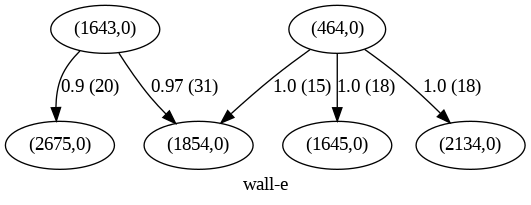

MAP LEGEND
title: wall-e
prob of acceptance threshold: 0.9
number of samples threshold: 15
number of arrows shown: 5
number of arrows dropped: 5420
(464,0):
(FULL) He moves to grab her.
(PART) He moves to grab her .
(1643,0):
(FULL) She giggles.
(PART) She giggles .
(1645,0):
(FULL) He opens his compactor door.
(PART) He opens his compactor door .
(1854,0):
(FULL) He looks up at the screen.
(PART) He looks up at the screen .
(2134,0):
(FULL) He groans.
(PART) He groans .
(2675,0):
(FULL) Turns him back around.
(PART) Turns him back around .


In [15]:
visualize_all_dags(prob_acc_thold=.9, nsam_thold=15, draw=True)

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
%%bash
zip -r m_scripts_dag_atlas.zip m_scripts_dag_atlas

  adding: m_scripts_dag_atlas/ (stored 0%)
  adding: m_scripts_dag_atlas/wall-e.pkl (deflated 81%)
  adding: m_scripts_dag_atlas/toy-story.pkl (deflated 79%)
  adding: m_scripts_dag_atlas/up.pkl (deflated 79%)
